### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:

# Import all libraries in this cell
from datetime import datetime
from pandas.io.parsers import TextParser
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
#scraping the data from the website using BeautifulSoup
# Save the data to a DataFrame object.
source= urllib.request.urlopen('https://covid19.ncdc.gov.ng/')
soup = BeautifulSoup(source,"lxml")

table = soup.find("table", {"id":"custom1"})




In [3]:
#creating a function for the cleaning of the scraped data
rows = table.find_all('tr')
def _unpack(row, kind='td'):
    elts = row.find_all(kind)
    return [val.text for val in elts]

In [4]:
def parse_options_data(tibb):
    data=[]
    rows = tibb.find_all('tr')
    header = _unpack(rows[0], kind='th')
    data1 = [_unpack(r) for r in rows[1:]]
    d1=[]
    for a in data1:
        d=[]
        for b in a:
            c=b.strip()
            d.append(c)
        d1.append(d)
    
    return TextParser(d1, names=header).get_chunk()

In [5]:
#Saving the cleaned data
NSCDC=parse_options_data(table)

In [6]:
NSCDC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [7]:
#loading in of the data after the data has been downloaded and saved in csv file 
#from the john hopkins repository using the link above
daily_R = pd.read_csv('daily_recovered_covid19_recovered_global.csv')
daily_D = pd.read_csv('daily_death_covid19_deaths_global.csv')
daily_C = pd.read_csv('daily_comfirmed_covid19_confirmed_global.csv')


In [8]:
daily_R['Country/Region'].nunique()

195

In [194]:
daily_R.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,153375,153395,153423,153534,153626,153736,153840,153962,153982,153990
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,149117,150101,150997,151499,152239,153318,154316,155293,156162,157026
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,197308,197659,198004,198313,198645,198962,199275,199560,199822,200068
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15055,15055,15055,15069,15070,15070,15078,15083,15083,15083
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,48261,48475,48656,48790,49114,49349,49628,49943,50348,50446


### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [9]:
# loading in the external dataset
covid_external = pd.read_csv('covid_external.csv')
budget = pd.read_csv('Budget data.csv')
realGDP = pd.read_csv('RealGDP.csv')
covidnig = pd.read_csv('covidnig.csv')


### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [10]:
#[Write Your Code Here]
#covidnig.head()
realGDP.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [13]:
realGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [11]:
budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [12]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [221]:
covidnig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [14]:
covidnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [15]:
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [16]:
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [17]:
#Renaming the columns of the scraped data
NSCDC.rename(columns={"States Affected":"states", "No. of Cases (Lab Confirmed)":"lab_comfirmed","No. of Cases (on admission)":"on_admission"}, inplace=True)

In [18]:
#Removing the commas in the numerical data of the scraped data so as to convert it to appropriate data type
NSCDC['lab_comfirmed']=NSCDC['lab_comfirmed'].apply(lambda x: x.replace(',',""))
NSCDC['on_admission']=NSCDC['on_admission'].apply(lambda x: x.replace(',',""))
NSCDC['No. Discharged']=NSCDC['No. Discharged'].apply(lambda x: x.replace(',',""))

In [19]:
#Converting the scraped data to appropriate data type(integer)
NSCDC[['lab_comfirmed','on_admission','No. Discharged','No. of Deaths']]=NSCDC[['lab_comfirmed','on_admission','No. Discharged','No. of Deaths']].astype(int)

In [20]:
#Extracting daily data for Nigeria from the Global daily cases data
daily_RN= daily_R[daily_R['Country/Region']=='Nigeria']
daily_DN= daily_D[daily_D['Country/Region']=='Nigeria']
daily_CN= daily_C[daily_C['Country/Region']=='Nigeria']

In [21]:
#Converting the extracted Nigeria data from the initial wide format to the apprpriate long format
daily_rn=pd.melt(daily_RN, daily_RN.columns[:4],daily_RN.columns[4:], 'date', 'Cases')
daily_dn=pd.melt(daily_DN, daily_DN.columns[:4],daily_DN.columns[4:], 'date', 'Cases')
daily_cn=pd.melt(daily_CN, daily_CN.columns[:4],daily_CN.columns[4:], 'date', 'Cases')

In [22]:
daily_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  0 non-null      object 
 1   Country/Region  600 non-null    object 
 2   Lat             600 non-null    float64
 3   Long            600 non-null    float64
 4   date            600 non-null    object 
 5   Cases           600 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 28.2+ KB


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [23]:
#Extracting the date and cases columns from the Nigeria data for further analysis
Daily_rn = daily_rn[['date','Cases']]
Daily_dn = daily_dn[['date','Cases']]
Daily_cn = daily_cn[['date','Cases']]

In [234]:
Daily_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    600 non-null    object
 1   Cases   600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

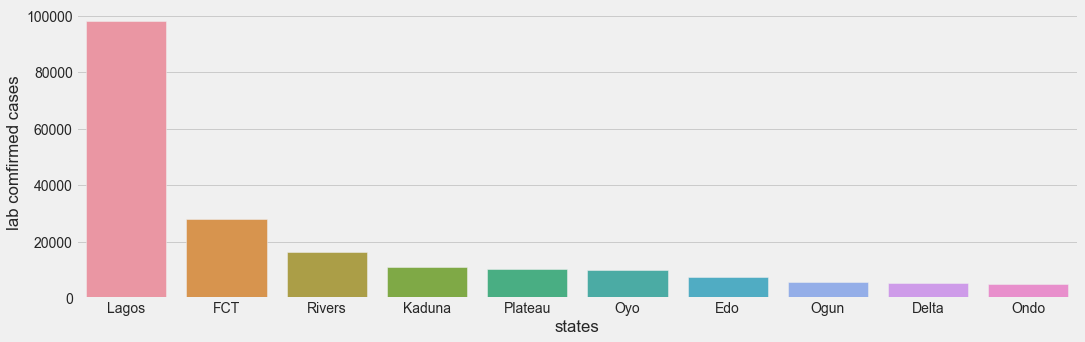

In [24]:
#plot showing the Top10 states in terms of comfirmed Covid cases by laboratory test
top_10_lab = NSCDC.nlargest(columns='lab_comfirmed', n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=top_10_lab, x='states', y='lab_comfirmed')
ax.set(ylabel='lab comfirmed cases');


TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

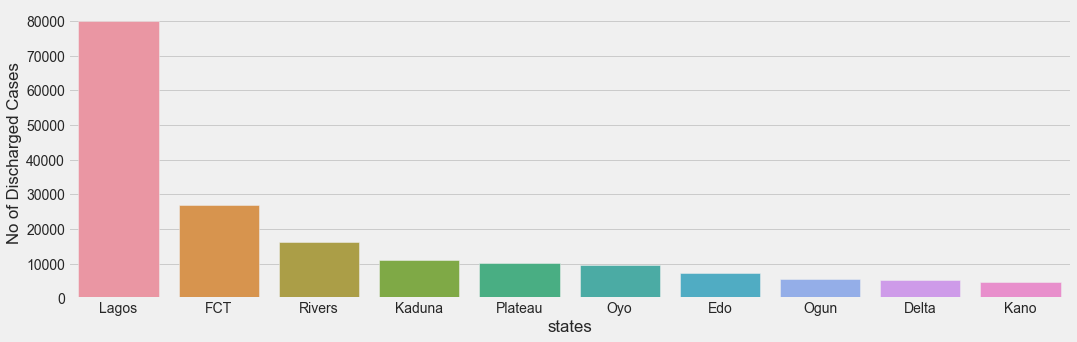

In [25]:
#plot showing the Top10 states in terms of Discharged covid cases
top_10_d = NSCDC.nlargest(columns='No. Discharged', n=10)
top_10_d=top_10_d.sort_values(by='No. Discharged', ascending=False)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=top_10_d, x='states', y='No. Discharged')
ax.set(ylabel='No of Discharged Cases');

TODO D - Plot the top 10 Death cases

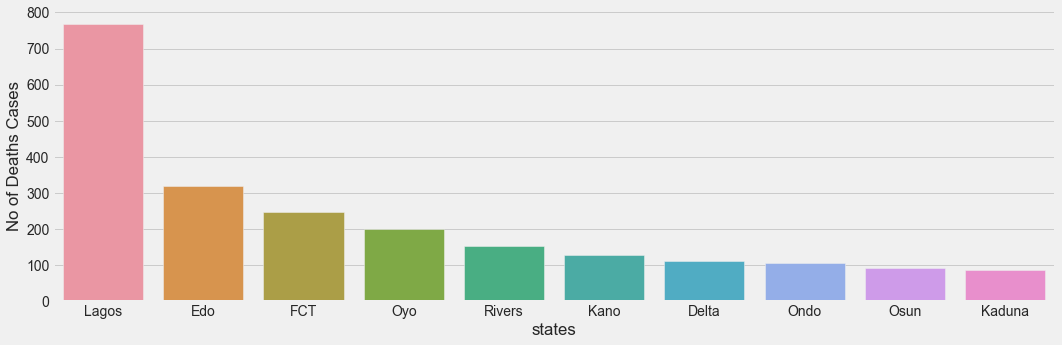

In [26]:
#plot showing the states with the Top10 Death cases
top_10_death = NSCDC.nlargest(columns='No. of Deaths', n=10)
top_10_death=top_10_death.sort_values(by='No. of Deaths', ascending=False)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=top_10_death, x='states', y='No. of Deaths')
ax.set(ylabel='No of Deaths Cases');

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

Merging of the dataframes for all the cases into a single dataframe to generate the line plot

In [27]:
daily_cases = pd.merge(Daily_rn, Daily_cn, left_on='date', right_on='date')

In [28]:
daily_case = pd.merge(daily_cases,Daily_dn, left_on='date', right_on='date')

In [29]:
#Reanaming the columns for the new dataframe
daily_case.rename(columns={'Cases_x':'Daily_recovered','Cases_y':'Daily_comfirmed','Cases':'Daily_death','date':'Date'}, inplace=True)

In [39]:
line_plot=pd.melt(daily_case, daily_case.columns[:1],daily_case.columns[1:], 'cases', 'Count')

In [31]:
#converting the Date column into a datetime object
line_plot['Date']= pd.to_datetime(line_plot['Date'])

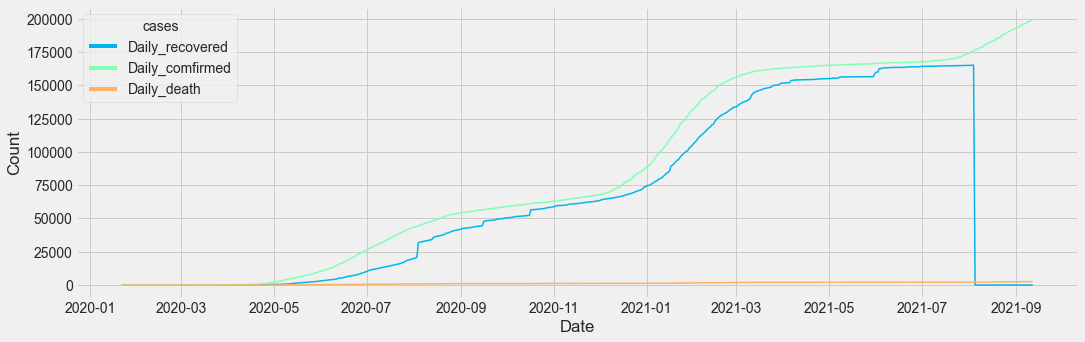

In [32]:
#A line plot showing the total daily comfirmed, recovered, and death cases in Nigeria
plt.figure(figsize=(16,5))
sns.lineplot('Date', 'Count', hue='cases',data=line_plot, estimator=sum, lw=1.5, palette='rainbow');
#plt.legend(title='Cases',loc='upper left',labels=['Daily recovered', 'Daily comfirmed', 'Daily deaths'])

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [33]:
#daily infection rate
daily_case['Daily_infection_rate']= daily_case['Daily_comfirmed'].diff()

In [41]:
#converting the date column to datetime data type
daily_case['Date']= pd.to_datetime(daily_case['Date'])

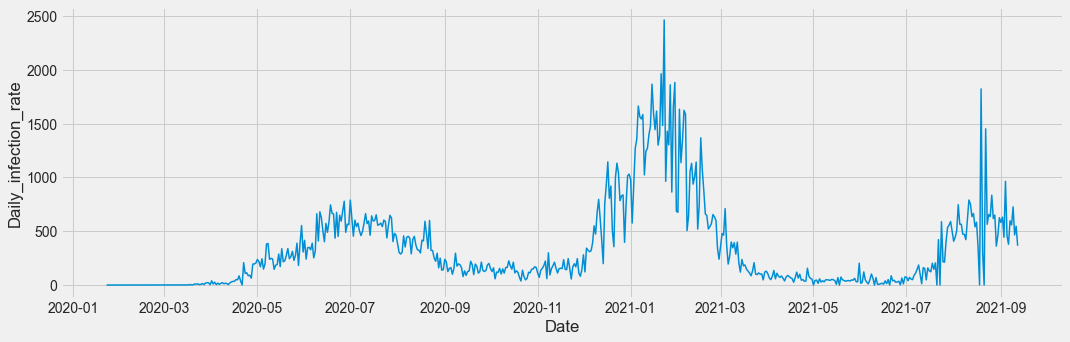

In [42]:
#A line plot showing the daily infection rate
plt.figure(figsize=(16,5))
sns.lineplot('Date', 'Daily_infection_rate',data=daily_case, estimator=sum, lw=1.5, palette='rainbow');

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [35]:
#Maximum infection rate
daily_case['Daily_infection_rate'].max()

2464.0

In [43]:
#Maximum infection rate date
daily_case[daily_case['Daily_infection_rate']==daily_case['Daily_infection_rate'].max()]['Date']

367   2021-01-23
Name: Date, dtype: datetime64[ns]

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [44]:
#merging of the external dataset and the NSCDC dataset on states
new_nscdc = pd.merge(NSCDC,covid_external, left_on='states', right_on='states')

In [49]:
new_nscdc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   35 non-null     object 
 1   lab_comfirmed            35 non-null     int32  
 2   on_admission             35 non-null     int32  
 3   No. Discharged           35 non-null     int32  
 4   No. of Deaths            35 non-null     int32  
 5   region                   35 non-null     object 
 6   Population               35 non-null     int64  
 7   Overall CCVI Index       35 non-null     float64
 8   Age                      35 non-null     float64
 9   Epidemiological          35 non-null     float64
 10  Fragility                35 non-null     float64
 11  Health System            35 non-null     float64
 12  Population Density       35 non-null     float64
 13  Socio-Economic           35 non-null     float64
 14   Transport Availability  35 

In [54]:
#Creating a dataframe for the Top10 states in terms of comfirmed cases
top_10_Lnscdc = new_nscdc.nlargest(columns='lab_comfirmed', n=10)
top_10_Lnscdc=top_10_nscdc.sort_values(by='lab_comfirmed', ascending=False)

In [56]:
#Creating a dataframe for the Top10 states in terms of comfirmed cases
top_10_Dnscdc = new_nscdc.nlargest(columns='No. of Deaths', n=10)
top_10_Dnscdc=top_10_nscdc.sort_values(by='No. of Deaths', ascending=False)

In [59]:
#Creating a dataframe for the Top10 states in terms of comfirmed cases
top_10_Dinscdc = new_nscdc.nlargest(columns='No. Discharged', n=10)
top_10_Dinscdc=top_10_nscdc.sort_values(by='No. Discharged', ascending=False)

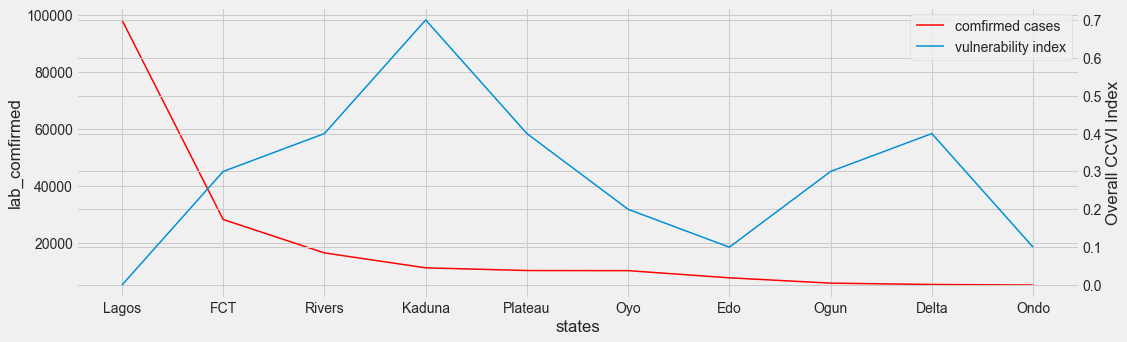

In [55]:
#A line plot showing the relationship between the comfirmed cases and vulnerability index
fig, ax= plt.subplots(figsize=(16,5))
ax2 =ax.twinx()
sns.lineplot('states', 'lab_comfirmed',data=top_10_Lnscdc, estimator=sum, lw=1.5, color='red', ax=ax)
sns.lineplot('states', 'Overall CCVI Index',data=top_10_Lnscdc, estimator=sum, lw=1.5,ax=ax2)
ax2.legend(handles=[a.lines[0] for a in [ax,ax2]],labels=['comfirmed cases', 'vulnerability index']);

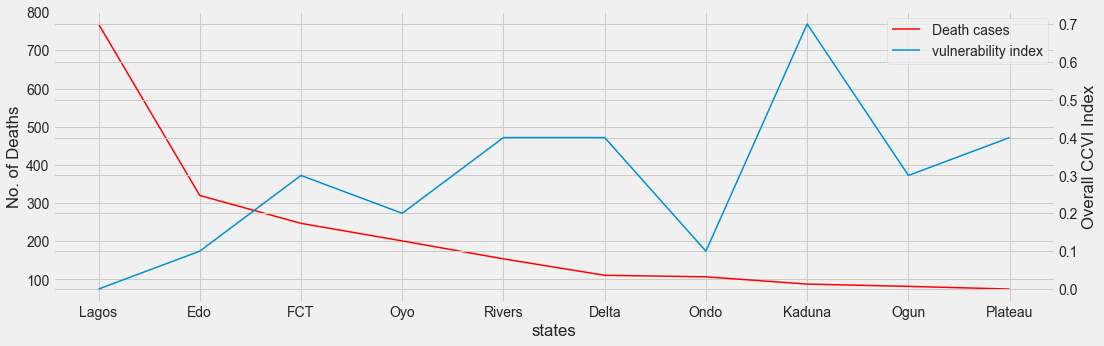

In [57]:
#A line plot showing the relationship between the comfirmed cases and vulnerability index
fig, ax= plt.subplots(figsize=(16,5))
ax2 =ax.twinx()
sns.lineplot('states', 'No. of Deaths',data=top_10_Dnscdc, estimator=sum, lw=1.5, color='red', ax=ax)
sns.lineplot('states', 'Overall CCVI Index',data=top_10_Dnscdc, estimator=sum, lw=1.5,ax=ax2)
ax2.legend(handles=[a.lines[0] for a in [ax,ax2]],labels=['Death cases', 'vulnerability index']);

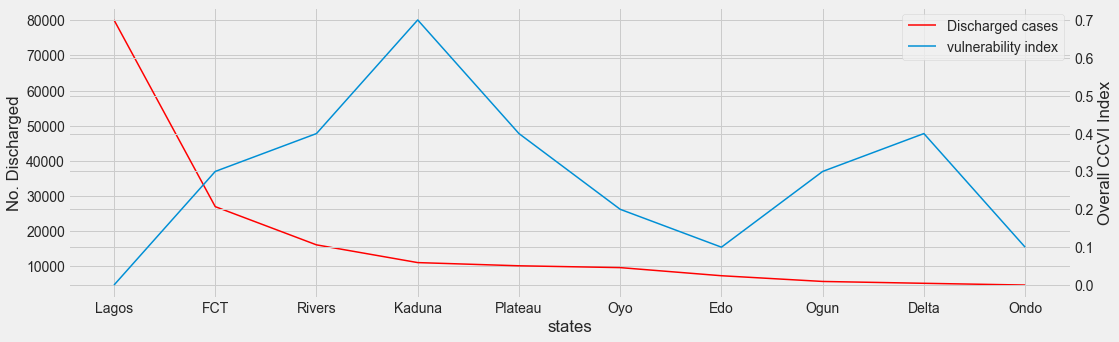

In [60]:
#A line plot showing the relationship between the comfirmed cases and vulnerability index
fig, ax= plt.subplots(figsize=(16,5))
ax2 =ax.twinx()
sns.lineplot('states', 'No. Discharged',data=top_10_Dinscdc, estimator=sum, lw=1.5, color='red', ax=ax)
sns.lineplot('states', 'Overall CCVI Index',data=top_10_Dinscdc, estimator=sum, lw=1.5,ax=ax2)
ax2.legend(handles=[a.lines[0] for a in [ax,ax2]],labels=['Discharged cases', 'vulnerability index']);

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

<AxesSubplot:xlabel='Population Density', ylabel='lab_comfirmed'>

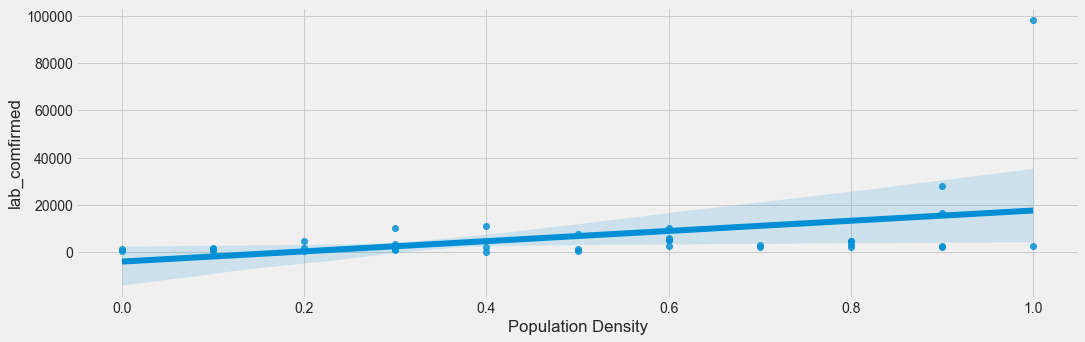

In [61]:
plt.figure(figsize=(16,5))
sns.regplot(x='Population Density', y='lab_comfirmed', data= new_nscdc)

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

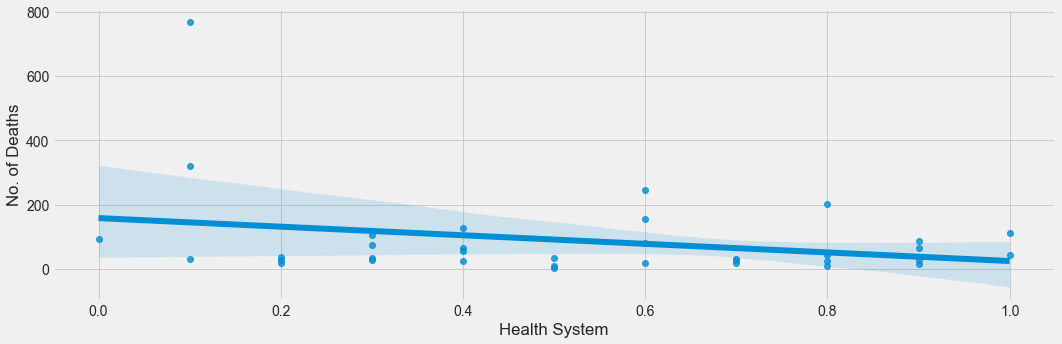

In [62]:
plt.figure(figsize=(16,5))
sns.regplot('Health System', 'No. of Deaths',data=new_nscdc);


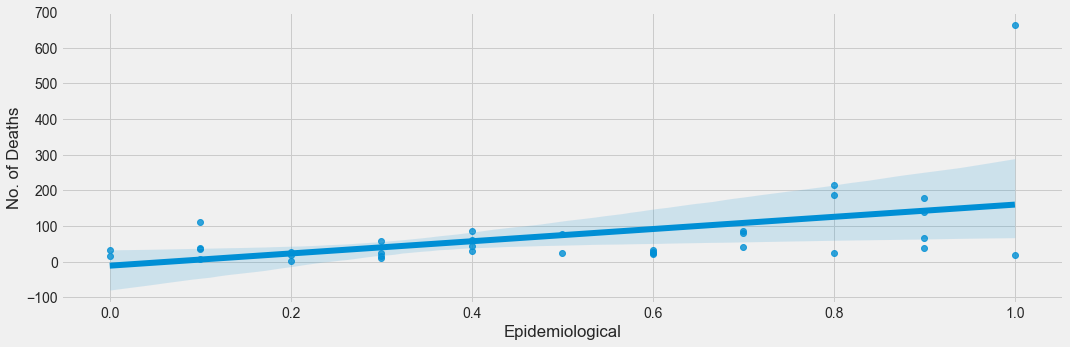

In [422]:
plt.figure(figsize=(16,5))
sns.regplot('Epidemiological', 'No. of Deaths',data=new_nscdc);


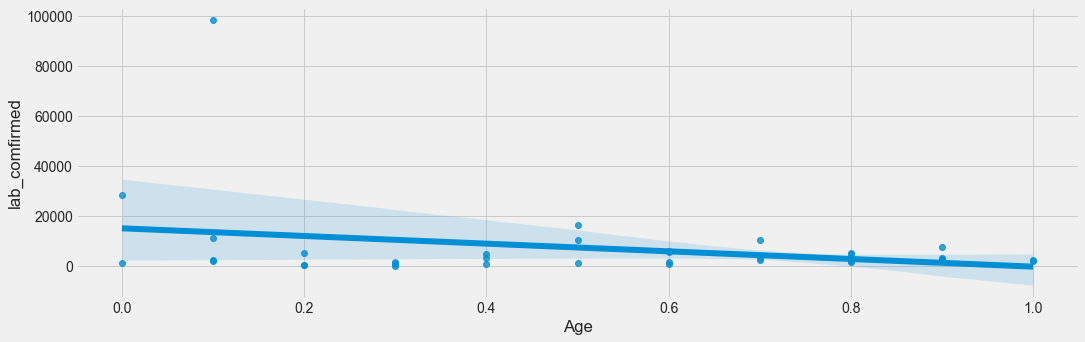

In [63]:
plt.figure(figsize=(16,5))
sns.regplot('Age', 'lab_comfirmed',data=new_nscdc);


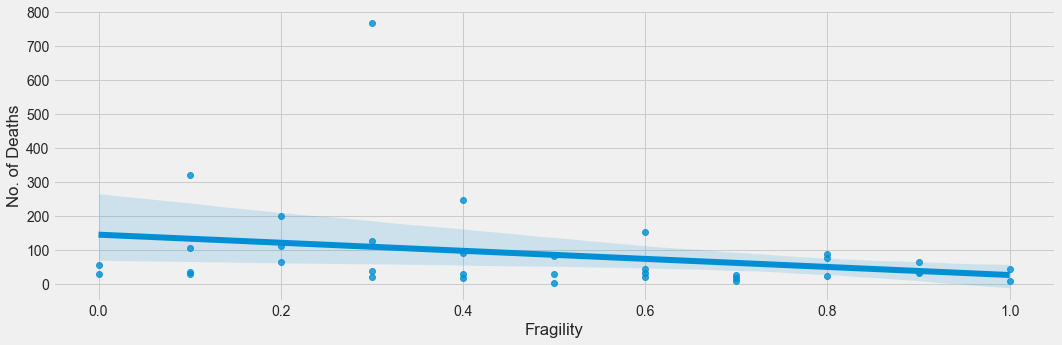

In [64]:
plt.figure(figsize=(16,5))
sns.regplot('Fragility', 'No. of Deaths',data=new_nscdc);


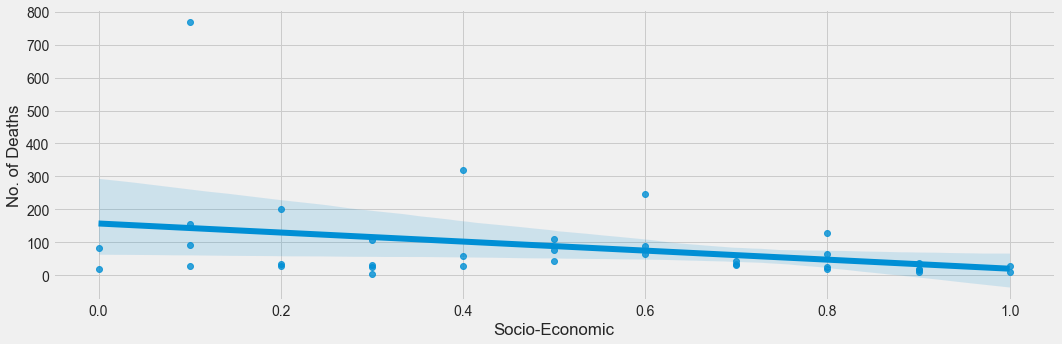

In [67]:
plt.figure(figsize=(16,5))
sns.regplot('Socio-Economic', 'No. of Deaths',data=new_nscdc);


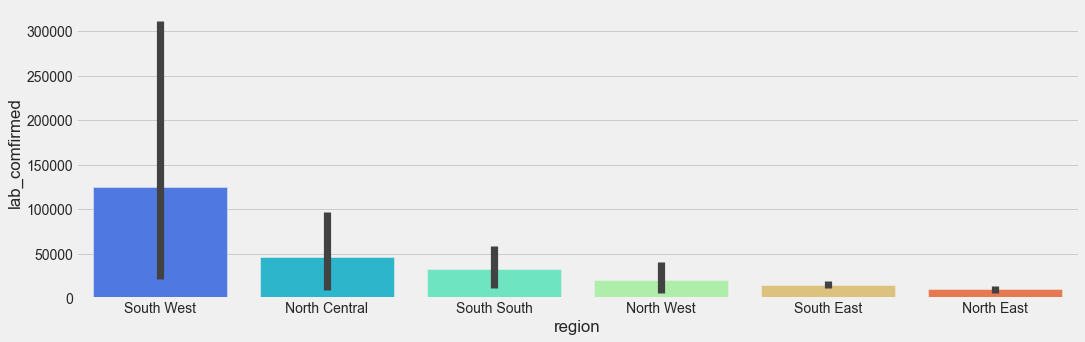

In [65]:
plt.figure(figsize=(16,5))
sns.barplot('region', 'lab_comfirmed',data=new_nscdc, estimator=sum, palette='rainbow');

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

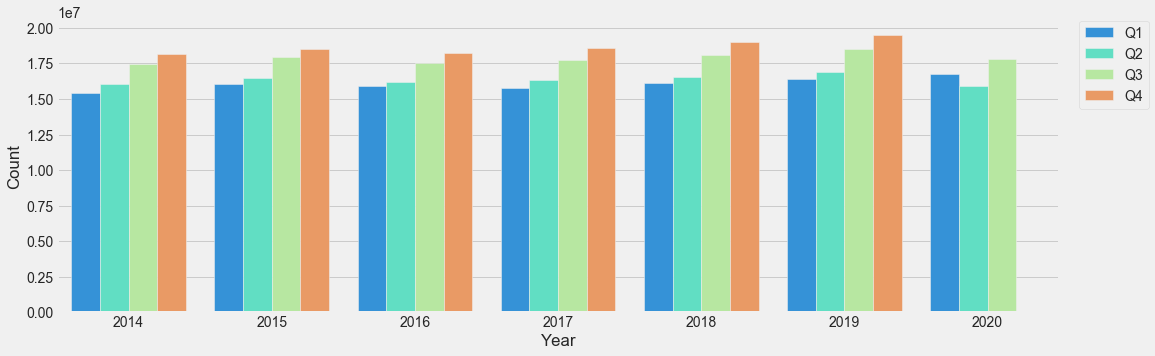

In [428]:
plt.figure(figsize=(16,5))
#bar_plot=pd.melt(realGDP, realGDP.columns[:1],realGDP.columns[1:], 'Quater', 'Count')
sns.barplot('Year', 'Count', data=bar_plot, hue='Quater', palette='rainbow')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)

In [70]:
budget_plot=pd.melt(budget, budget.columns[:1],budget.columns[1:], 'Budget_type', 'Budget')

In [72]:
budget_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   states       74 non-null     object 
 1   Budget_type  74 non-null     object 
 2   Budget       74 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


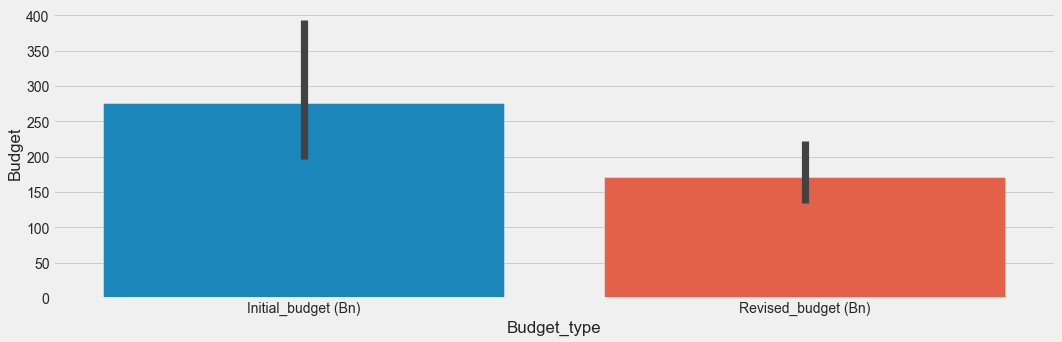

In [79]:
#plot showing initial budget pre_covid and revised budget post_covid
plt.figure(figsize=(16,5))
sns.barplot('Budget_type','Budget', data=budget_plot,estimator=np.mean);

In [80]:
#creating a function that measure the differnt between the budget for all the state pre_covid19 and post_covid19
def diff(z, x=budget_plot):
    d=x.groupby(z).Budget.agg('mean').sort_values(ascending=False)
    return(d[0]-d[-1])

In [81]:
#the different between the pre_covid19 and post_covid19 budget for all the state
diff('Budget_type')

105.1278378378378